## 4-1 영화 리뷰 분류

- 총 5만개의 데이터 훈련, 테스트는 25,000개씩 나눠져있음
-

In [2]:
from tensorflow.keras.datasets import imdb
import numpy as np

In [3]:
# 총 8만8천개의 index중 많이 사용되는 단어 10,000개만 데이터를 가져옴
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words =10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# 데이터의 형태 확인
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
len(train_data[0])

218

In [6]:
len(train_data[10])

450

In [7]:
# index 되기전 데이터 형태 확인
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]])

decoded_review

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 4-1의 데이터셋을 랜덤하게 추론하면 정확도가 몇일까?

#### 랜덤 accuracy는 0.5017이다!

In [8]:
## 4-1 데이터를 랜덤 추론한 결과
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.50256

## 데이터 준비

현재 데이터는 모두 숫자의 길이가 다른 데이터들로 이루어져있다 이를 위해서 두가지 방법이 존재하는데  

- 같은 길이가 되도록 리스트에 패딩을 추가 (sample, max_length)크기의 정수 텐서로 변환하는 방식 -> Embedding 층으로 시작 (정수 텐서를 다루는 층)
- 리스트를 멀티핫 인코딩으로 변환하는 방식 - > Dense 층으로 시작 (부동소수점 벡터 데이터)

이번에는 두번째 방식을 씁니다 인덱스가 모두 10,000개이니 각자 1과 0의 데이터를 가지는.. 10,000개의 열을 가지는 데이터가 생성이 되겠네요 ㅎㄷㄷ

In [9]:
## 멀티 핫 인코딩
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequences in enumerate(sequences):
        for j in sequences:
            results[i,j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")

In [10]:
print(x_train.shape)
print(y_train.shape)

(25000, 10000)
(25000,)


## 4-1 모델 만들기

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    # 이진 분류 문제이므로 마지막 활성화 함수는 시그모이드
    layers.Dense(1, activation="sigmoid")
])

In [12]:
# 모델 컴파일
model.compile(optimizer="rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [13]:
# vaildation셋 만들기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
print(partial_x_train.shape)
print(partial_y_train.shape)

(15000, 10000)
(15000,)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.countplot(x=test_labels)
plt.title('Countplot of Array Values')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 오류

다음과 같은 오류가 나왔었는데
바꾸는것 없이 다시 돌렸더니 해결되었다...

In[0] and In[1] has different ndims: [512,10000] vs. [0]
	 [[{{node sequential_1/dense_1/MatMul}}]] [Op:__inference_one_step_on_iterator_1601]

In [17]:
# 모델 학습
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.6778 - loss: 0.6209 - val_accuracy: 0.8383 - val_loss: 0.4507
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.8858 - loss: 0.3795 - val_accuracy: 0.8803 - val_loss: 0.3334
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9118 - loss: 0.2777 - val_accuracy: 0.8886 - val_loss: 0.2922
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9326 - loss: 0.2098 - val_accuracy: 0.8906 - val_loss: 0.2749
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9463 - loss: 0.1688 - val_accuracy: 0.8898 - val_loss: 0.2740
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9523 - loss: 0.1452 - val_accuracy: 0.8822 - val_loss: 0.2982
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9594 - loss: 0.1325 - val_accuracy: 0.8858 - val_loss: 0.2896
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9715 - loss: 0.1017 - val_accuracy: 0.8785 -

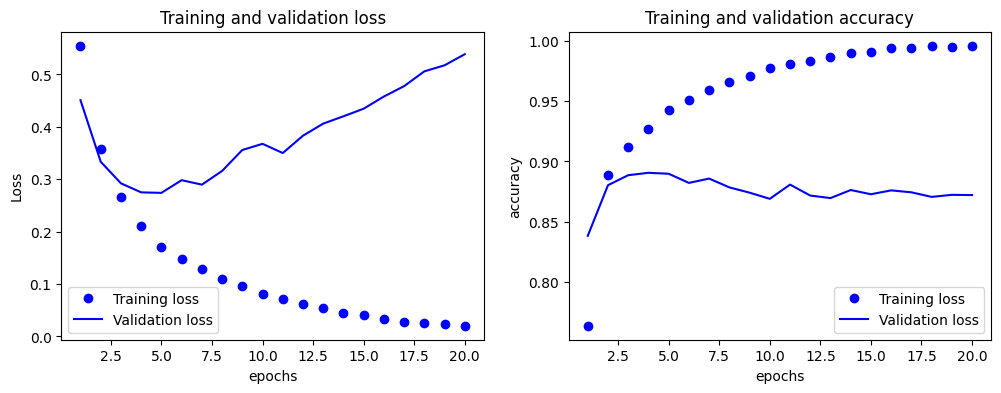

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(epochs, loss_values, "bo", label="Training loss")
ax[0].plot(epochs, val_loss_values, "b", label="Validation loss")
ax[0].set_title("Training and validation loss")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(epochs, acc, "bo", label="Training loss")
ax[1].plot(epochs, val_acc, "b", label="Validation loss")
ax[1].set_title("Training and validation accuracy")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("accuracy")
ax[1].legend()
plt.show()

# 결과

9번째 에포크이후 vali loss가 증가하는 추세를 보이므로
에포크를 9번째까지 학습시킨다

In [33]:
# 다시 시작

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss = "mse",
              metrics = ["accuracy"])
model.fit(x_train,y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.7245 - loss: 0.1951
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8964 - loss: 0.0923
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9178 - loss: 0.0704
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9309 - loss: 0.0594
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8822 - loss: 0.0876


In [34]:
results

[0.08621995151042938, 0.8850399851799011]

# 각 모델의 크기를 변화시키면서 결과값의 차이를 본다.
  고정값

  1. epochs = 4  -> validation 검증을 통해서 epochs 수를 결정함
  2. batch_size = 512

  ```python

  model.compile(optimizer="rmsprop",
                loss = "binary_crossentropy",
                metrics = ["accuracy"])

  model = keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(1, activation="sigmoid")
  ])
  ```

  -> 이 모델의 결과 [0.30518344044685364, 0.8780400156974792] # 테스트 손실, 정확도


  동일한 조건에서 레이어의 개수를 하나 줄여봤습니다

  ```python
  model = keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(1, activation="sigmoid")
  ])
  ```

  -> [0.27631404995918274, 0.8887199759483337] 오 오히려 성능이 늘어났다!

  층을 3개로 높여봤다

  -> [0.3006548583507538, 0.8824800252914429]


  ```python
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1, activation="sigmoid")
  ])
  ```

  -> 층 유닛의 개수를 64개로 늘려봤다

  [0.2946609854698181, 0.8846799731254578]

```python
  model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss = "mse",
              metrics = ["accuracy"])

```
-> loss를 mse로 변경해봤다
loss 자체는 다른 단위이다 보니 다른 값이 나왔고 정확도는 비슷하다

[0.08621995151042938, 0.8850399851799011]

## 4-2의 데이터셋의 편차가 큰것아닐까?

test date에서는 3번 레이블이 800개 정도로 엄청나게 많이 분류가되어있다

In [65]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words =10000)

In [69]:

from tensorflow.keras.utils import to_categorical

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)



In [70]:
train_data.shape

(8982,)

In [71]:
# 각 정수를 46개의 컬럼을 만들고 one-hot encoding을 진행함
y_train.shape

(8982, 46)

In [57]:
# 모델 정의

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ["accuracy"])

In [62]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [59]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.3336 - loss: 3.1863 - val_accuracy: 0.6060 - val_loss: 1.8436
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.6537 - loss: 1.6275 - val_accuracy: 0.7080 - val_loss: 1.3878
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7395 - loss: 1.2190 - val_accuracy: 0.7390 - val_loss: 1.2082
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7953 - loss: 0.9584 - val_accuracy: 0.7600 - val_loss: 1.0838
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8238 - loss: 0.8205 - val_accuracy: 0.7830 - val_loss: 1.0207
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8640 - loss: 0.6638 - val_accuracy: 0.7660 - val_loss: 1.0291
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8828 - loss: 0.5522 - val_accuracy: 0.7990 - val_loss: 0.9225
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8990 - loss: 0.4648 - val_accuracy: 0.8020 - 

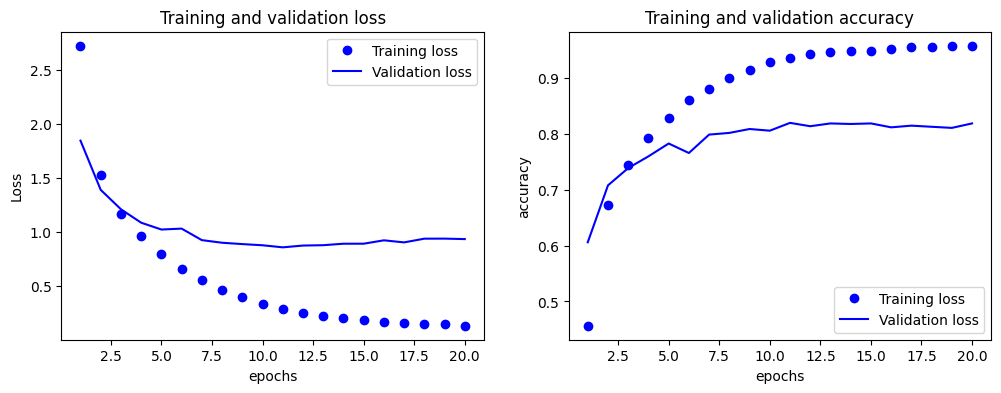

In [60]:
import matplotlib.pyplot as plt
history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(epochs, loss_values, "bo", label="Training loss")
ax[0].plot(epochs, val_loss_values, "b", label="Validation loss")
ax[0].set_title("Training and validation loss")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(epochs, acc, "bo", label="Training loss")
ax[1].plot(epochs, val_acc, "b", label="Validation loss")
ax[1].set_title("Training and validation accuracy")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("accuracy")
ax[1].legend()
plt.show()

In [73]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])
model.fit(x_train,y_train,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test,y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.3538 - loss: 3.1209
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6630 - loss: 1.6268
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.7449 - loss: 1.1969
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.7898 - loss: 0.9804
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8266 - loss: 0.8164
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8589 - loss: 0.6706
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8853 - loss: 0.5582
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9054 - loss: 0.4561
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9217 - loss: 0.3863
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.9110


In [75]:
results

[0.9405145645141602, 0.790739119052887]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.countplot(x=test_labels)
plt.title('Countplot of Array Values')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()